# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## VI. Profils de production saisonniers des vre

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [25]:
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv")
vre2017.columns = ["vre", "heure", "prod"]

vre2017["vre"][8758]  #dernier offshore
vre2017["vre"][8759]  #1er     onshore
vre2017["vre"][17518] #dernier onshore
vre2017["vre"][17519] #1er     pv
vre2017["vre"][26278] #dernier pv
vre2017

,vre,heure,prod
0,offshore,1,0.400714
1,offshore,2,0.406429
2,offshore,3,0.414429
3,offshore,4,0.433429
4,offshore,5,0.473857
...,...,...,...
26274,pv,8755,0.000000
26275,pv,8756,0.000000
26276,pv,8757,0.000000
26277,pv,8758,0.000000


In [3]:
vre2016 = pd.read_csv("inputs/vre_profiles2016.csv")
vre2016.columns = ["vre", "heure", "prod"]
vre2015 = pd.read_csv("inputs/vre_profiles2015.csv")
vre2015.columns = ["vre", "heure", "prod"]
vre2014 = pd.read_csv("inputs/vre_profiles2014.csv")
vre2014.columns = ["vre", "heure", "prod"]
vre2013 = pd.read_csv("inputs/vre_profiles2013.csv")
vre2013.columns = ["vre", "heure", "prod"]
vre2012 = pd.read_csv("inputs/vre_profiles2012.csv")
vre2012.columns = ["vre", "heure", "prod"]
vre2011 = pd.read_csv("inputs/vre_profiles2011.csv")
vre2011.columns = ["vre", "heure", "prod"]
vre2010 = pd.read_csv("inputs/vre_profiles2010.csv")
vre2010.columns = ["vre", "heure", "prod"]

### 1. Utils

In [5]:
def Moyenne_semaine(profil):
    jours, semaines = np.shape(profil)
    moy_semaine = np.zeros(semaines)
    for s in range(semaines):
        for j in range(jours):
            moy_semaine[s] += profil[j,s]
    moy_semaine = moy_semaine/jours
    return moy_semaine

In [6]:
def Moyenne_saison(profil, vre):
    if vre=="offshore":
        n=0
    elif vre=="onshore":
        n=8759
    elif vre=="pv":
        n=17519
        
    profil_semaine = np.zeros((7,52))
    for m in range(52):
        for j in range(7):
            for h in range(24):
                profil_semaine[j-1,m-1] += [profil["prod"][24*(j+m*7)+h+1+n]]  #pb ne va pas jusqu'aux bonnes valeurs


    #Hiver :  11+1  (11 premieres semaines de l'annee + la derniere semaine de l'annee)
    hiver_m = np.zeros((7,12))
    hiver_m[:,:11] = profil_semaine[:,:11]
    hiver_m[:,-1] = profil_semaine[:,-1]
    hiver_moy = Moyenne_semaine(hiver_m)
    
    #Printemps :  13
    printemps_m = np.zeros((7,13))
    printemps_m = profil_semaine[:,11:24]
    printemps_moy = Moyenne_semaine(printemps_m)

    #Eté :  14
    ete_m = np.zeros((7,14))
    ete_m = profil_semaine[:,24:38]
    ete_moy = Moyenne_semaine(ete_m)

    #Automne :  13
    automne_m = np.zeros((7,13))
    automne_m = profil_semaine[:,38:51]
    automne_moy = Moyenne_semaine(automne_m)

    return printemps_moy, automne_moy, ete_moy, hiver_moy

In [7]:
def Profils_saisonniers(profil, vre, saison, annee=0, verbose=False):
    
    printemps_moy, automne_moy, ete_moy, hiver_moy = Moyenne_saison(profil, vre)
    
    if saison=="tout":   
        plt.plot(hiver_moy, label="hiver")
        plt.plot(ete_moy, label="été")
        plt.plot(automne_moy, label="automne")
        plt.plot(printemps_moy, label="printemps")
        plt.title("Profils saisonniers de la production par semaine de la technologie : " + vre)
        
    elif saison=="printemps":
        plt.plot(printemps_moy, label=annee)
        plt.title("Profil " + "pintanier" + " de la production par semaine de la technologie : " + vre)
        
    elif saison=="ete":
        plt.plot(ete_moy, label=annee)
        plt.title("Profil " + "estival" + " de la production par semaine de la technologie : " + vre)
        
    elif saison=="automne":
        plt.plot(automne_moy, label=annee)
        plt.title("Profil " + "automnal" + " de la production par semaine de la technologie : " + vre)
        
    elif saison=="hiver":
        plt.plot(hiver_moy, label=annee)
        plt.title("Profil " + "hivernal" + " de la production par semaine de la technologie : " + vre)
    
    plt.xlabel("Semaines de la saison")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    if verbose:
        return moy_hiver,moy_printemps,moy_ete,moy_automne

In [8]:
def Affichage_saisonnier(vre, saison):
    Profils_saisonniers(vre2017, vre, saison, "2017")
    Profils_saisonniers(vre2016, vre, saison, "2016")
    Profils_saisonniers(vre2015, vre, saison, "2015")
    Profils_saisonniers(vre2014, vre, saison, "2014")
    Profils_saisonniers(vre2013, vre, saison, "2013")
    Profils_saisonniers(vre2012, vre, saison, "2012")
    Profils_saisonniers(vre2011, vre, saison, "2011")
    Profils_saisonniers(vre2010, vre, saison, "2010")
    #plt.show()

### 2. Profils de l'éolien offshore

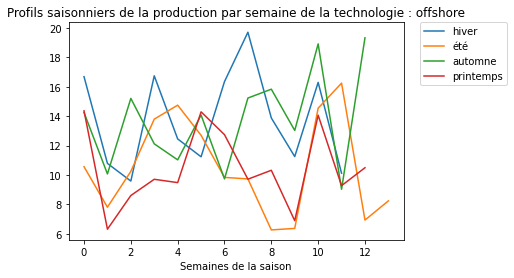

In [9]:
Profils_saisonniers(vre2017, "offshore", "tout")

### 3. Profils de l'éolien onshore

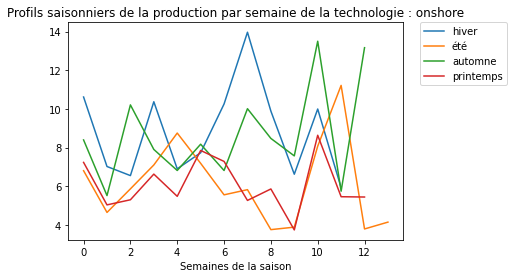

In [10]:
Profils_saisonniers(vre2017, "onshore", "tout")

### 4. Profils du solaire

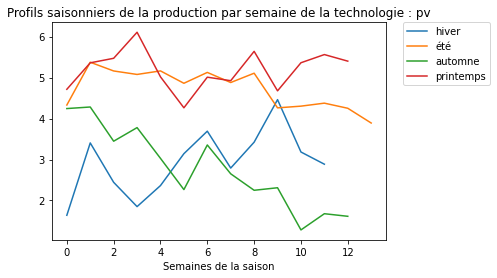

In [11]:
Profils_saisonniers(vre2017, "pv", "tout")

### 5. Profils sur plusieurs années

#### 5.1 Profils solaires

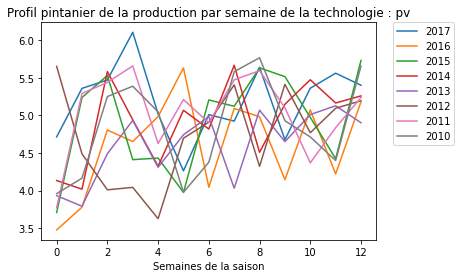

In [12]:
Affichage_saisonnier("pv","printemps")

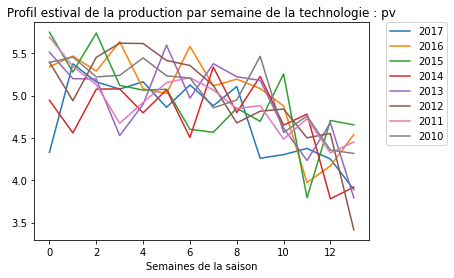

In [13]:
Affichage_saisonnier("pv","ete")

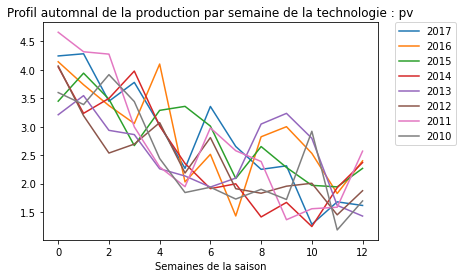

In [14]:
Affichage_saisonnier("pv","automne")

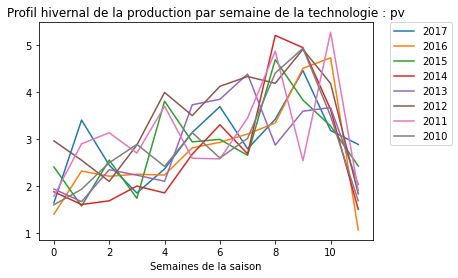

In [15]:
Affichage_saisonnier("pv","hiver")

#### 5.2. Profils onshore

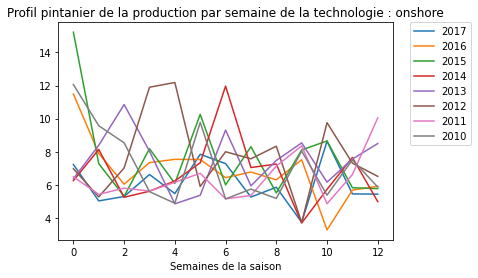

In [17]:
Affichage_saisonnier("onshore","printemps")

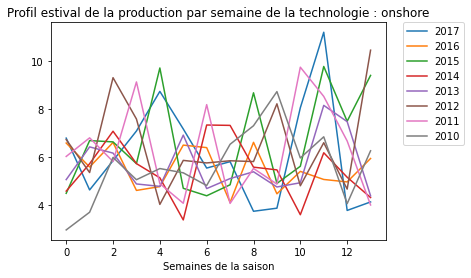

In [18]:
Affichage_saisonnier("onshore","ete")

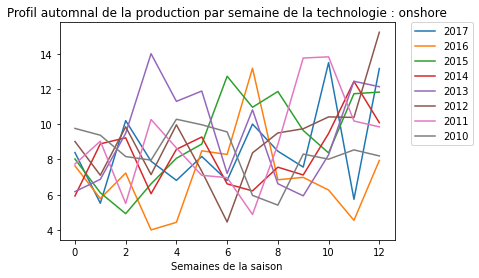

In [19]:
Affichage_saisonnier("onshore","automne")

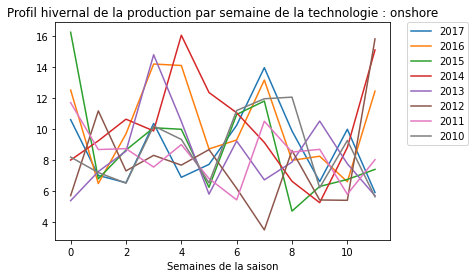

In [20]:
Affichage_saisonnier("onshore","hiver")

#### 5.3. Profils offshore

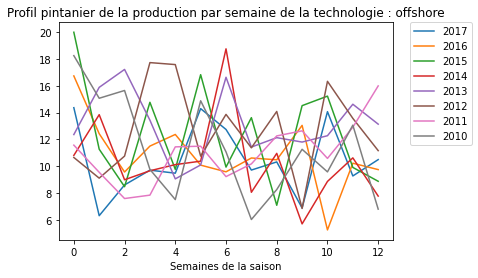

In [21]:
Affichage_saisonnier("offshore","printemps")

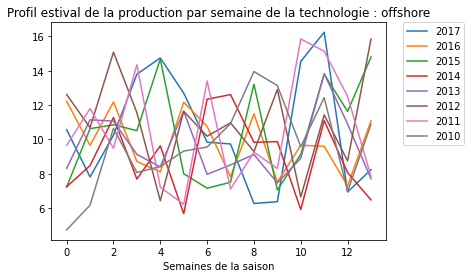

In [22]:
Affichage_saisonnier("offshore","ete")

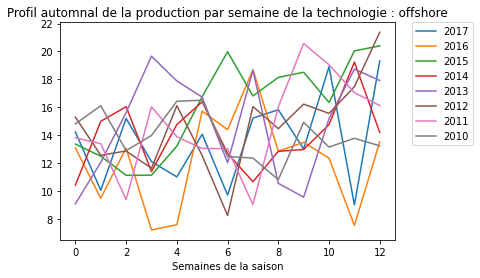

In [23]:
Affichage_saisonnier("offshore","automne")

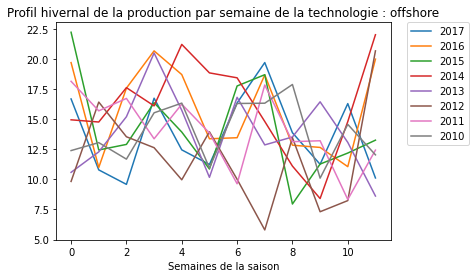

In [24]:
Affichage_saisonnier("offshore","hiver")